In [1]:
# %load C60_jupyter_imports.py
%load_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
from dask.distributed import Client
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import xesmf as xe
from scipy.stats import linregress
import os
import requests
# Lets import our functions. There are no tests here. Stored separately so as to not make a mess.
# Make sure in right dir first

os.chdir('/g/data/xv83/np1383/src_CAFE60_eqpac_analysis_code/')

In [2]:
# Set up the remote dask cluster
from dask.distributed import Client,Scheduler
from dask_jobqueue import SLURMCluster
cluster = SLURMCluster(cores=2,memory="16GB")
client = Client(cluster)
cluster.scale(cores=8)
#cluster.adapt(minimum=2, maximum=16)
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 32785 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: /proxy/32785/status,
Dashboard: /proxy/32785/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.0.128.139:33479,Workers: 0
Dashboard: /proxy/32785/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [3]:
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: /proxy/32785/status,
Dashboard: /proxy/32785/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.0.128.139:33479,Workers: 0
Dashboard: /proxy/32785/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [4]:
#cluster.scale(cores=2)##

In [5]:
#Attempting a plotting function
def mean_trends_82_20(lmean,ltrend82,ltrend20,rmean,rtrend82,rtrend20,titles,ltrendmm=None,rtrendmm=None,ltrendm=None,rtrendm=None,l_conversion=1,r_conversion=1,meancolormap='bwr',figsize=(20,10)):
    '''
    lmean     xrarr
    ltrend82  xrarr
    ltrend82p xarr
    ltrend20  xrarr
    ltrend20p pval xarr
    
    rmean     xrarr
    rtrend82  xrarr
    rtrend82p pval xarr
    rtrend20  xrarr 
    rtrend20p pval xarr
    titles    array[1,2,3,4,5,6]
    l_conversion float
    r_conversion float
    meancolormap     str cmap (ie viridis)
    
    Will dynamically produce a 3 x 2 (6) subplot with mean on top and 82 and 2000 trends below. 
    Can produce for any trend variable (produce mean over time, need a flag for this?)
    
    '''
    
    plt.figure(figsize=figsize)
    plt.subplot(321)
    if type(ltrendm)==type(None):
        (lmean.mean(dim='time')*l_conversion).plot(cmap=meancolormap) 
    else:
        (lmean.mean(dim='time')*l_conversion).plot(vmin=ltrendm[1],vmax=ltrendm[0],cmap=meancolormap)
    plt.title(titles[0])
    #(((cafe_co2_mean.stf10.mean(dim='time')/1000)*86400)*-12)
    #plt.title('CAFE ens mean mean CO2 flux out of ocean (gC m2 day)')

    plt.subplot(322)
    if type(ltrendm)==type(None):
        (rmean.mean(dim='time')*r_conversion).plot(cmap=meancolormap) 
    else:
        (rmean.mean(dim='time')*r_conversion).plot(vmin=rtrendm[1],vmax=rtrendm[0],cmap=meancolormap)
    plt.title(titles[1])
    #(land_obs.fgco2_smoothed/365).mean(dim='time').plot(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('Lanschutzer mean CO2 flux out of ocean (gC m2 day)')

    plt.subplot(323)
    if type(ltrendmm)==type(None):
        (ltrend82*l_conversion).plot(cmap='bwr')
    else:
        (ltrend82*l_conversion).plot(vmax=ltrendmm[1],vmin=ltrendmm[0],cmap='bwr')
    plt.title(titles[2])
    #((((cafe_co2_82tr.trend/1000)*86400)*-12*1000)).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('CAFE CO2 flux longterm trends 1982-2020  (mgC/m2/day/year)')
    #plt.contourf(cafe_co2_82tr.pval.lon,cafe_co2_82tr.pval.lat,cafe_co2_82tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
 


    plt.subplot(324)
    if type(rtrendmm)==type(None):
        (rtrend82*r_conversion).plot(cmap='bwr')
    
    else:
        (rtrend82*r_conversion).plot(vmax=rtrendmm[1],vmin=rtrendmm[0],cmap='bwr')
    plt.title(titles[3])
    #((land_obs_tr_1982.trend)*1000).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('Landshutzer CO2 flux longterm trends 1982-2020  (mgC/m2/day/year)')
    #plt.contourf(land_obs_tr_1982.pval.lon,land_obs_tr_1982.pval.lat,land_obs_tr_1982.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   


    plt.subplot(325)
    if type(ltrendmm)==type(None):
        (ltrend20*l_conversion).plot(cmap='bwr')
    else:
        (ltrend20*l_conversion).plot(vmax=ltrendmm[1],vmin=ltrendmm[0],cmap='bwr')
    plt.title(titles[4])
    #((((cafe_co2_20tr.trend/1000)*86400)*-12*1000)).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('CAFE CO2 flux longterm trends 2000-2020  (mgC/m2/day/year)')
    #plt.contourf(cafe_co2_20tr.pval.lon,cafe_co2_20tr.pval.lat,cafe_co2_20tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
    #plt.tight_layout()


    plt.subplot(326)
    if type(rtrendmm)==type(None):
        (rtrend20*r_conversion).plot(cmap='bwr')
    else:
        (rtrend20*r_conversion).plot(vmax=rtrendmm[1],vmin=rtrendmm[0],cmap='bwr')
    plt.title(titles[5])
    #((land_obs_tr_2000.trend)*1000).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
    #plt.title('Landshutzer CO2 flux longterm trends 2000-2020  (mgC/m2/day/year)')
    #plt.contourf(land_obs_tr_2000.pval.lon,land_obs_tr_2000.pval.lat,land_obs_tr_2000.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
    plt.tight_layout()
    plt.show()

### Reminder for units

In [6]:
d=xr.open_zarr('/g/data/xv83/dcfp/CAFE60v1/ocean_bgc_month.zarr.zip',consolidated=True)
for i in d.variables:
    if len(i)<8:
        t='\t\t'
    else:#if len(i)<13:
        t='\t'
    try:
        print(i+t+d[i].units)
    except:
        print(i+t+'no units')

adic		mmol/m^3
alk		mmol/m^3
caco3		mmol/m^3
caco3_sediment	mmolN/m^2
det		mmol/m^3
det_sediment	mmolN/m^2
dic		mmol/m^3
ensemble	no units
export_inorg	mmolC/m^2/s
export_prod	mmolN/m^2/s
fe		mmol/m^3
no3		mmol/m^3
o2		mmol/m^3
paco2		
pco2		
phy		mmol/m^3
pprod_gross	mmolN/m^3/s
pprod_gross_2d	mmolN/m^2/s
scalar_axis	none
st_ocean	meters
stf03		mmol/m^2/s
stf07		mmol/m^2/s
stf10		mmol/m^2/s
surface_adic	mmol/m^3
surface_alk	mmol/m^3
surface_caco3	mmol/m^3
surface_det	mmol/m^3
surface_dic	mmol/m^3
surface_fe	mmol/m^3
surface_no3	mmol/m^3
surface_o2	mmol/m^3
surface_phy	mmol/m^3
surface_zoo	mmol/m^3
time		no units
total_aco2_flux	Pg/yr
total_co2_flux	Pg/yr
xt_ocean	degrees_E
yt_ocean	degrees_N
zoo		mmol/m^3


## Load our data in

In [7]:
!ls ../processed_data/obs #../processed_data/eqpac/

landshutzer_eqpac_regrid.nc		 sst.mnmean.regrid.eqpac.trend.1982.nc
landshutzer_eqpac_regrid_trend_1982.nc	 sst.mnmean.regrid.eqpac.trend.2000.nc
landshutzer_eqpac_regrid_trend_2000.nc	 sst.mnmean.regrid.global.nc
landshutzer_global_regrid.nc		 sst.mnmean.regrid.global.trend.1982.nc
landshutzer_global_regrid_trend_1982.nc  sst.mnmean.regrid.global.trend.2000.nc
landshutzer_global_regrid_trend_2000.nc  TPCA_month_regrid.nc
sst.mnmean.regrid.eqpac.nc


In [8]:
!ls ../processed_data/cafe/ #../processed_data/eqpac/

eqpac  global


In [9]:
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: /proxy/32785/status,
Dashboard: /proxy/32785/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.0.128.139:33479,Workers: 0
Dashboard: /proxy/32785/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [10]:
cafe_co2_all=xr.open_dataset('../processed_data/cafe/eqpac/stf10_ensmean_1982_all_ensembles.nc',chunks={'time':1})#.chunk({'time':1})#/1000)*86400)*-12)#g/m2/day
cafe_sst_all=xr.open_dataset('../processed_data/cafe/eqpac/sst_ensmean_1982_all_ensembles.nc',chunks={'time':1})#.chunk({'time':1})
cafe_co2_all_g=((cafe_co2_all/1000)*86400*-12) #g/m2/day
cafe_co2_all_g

,Array,Chunk
Bytes,5.43 GiB,12.20 MiB
Shape,"(456, 96, 98, 170)","(1, 96, 98, 170)"
Count,1825 Tasks,456 Chunks
Type,float64,numpy.ndarray


In [11]:
best_ensemble_member=25 # Calculated in 8: Get best ens members.

In [12]:
#Bring all the unit conversions here. 

phy_mean=xr.open_dataset('../processed_data/cafe/eqpac/phy_ensmean_1982_15m_.nc')
#phy_std=xr.open_dataset('../processed_data/eqpac/surface_phy_ensstd_1982.nc')
phy_trend82=xr.open_dataset('../processed_data/cafe/eqpac/phy_meantrends_1982_15m_.nc')
phy_trend20=xr.open_dataset('../processed_data/cafe/eqpac/phy_meantrends_2000_15m_.nc')

#pprod_std=xr.open_dataset('../processed_data/eqpac/pprod_gross_2d_ensstd../_1982.nc')
pprod_mean=xr.open_dataset('../processed_data/cafe/eqpac/pprod_gross_2d_ensmean_1982.nc')
pprod_trend82=xr.open_dataset('../processed_data/cafe/eqpac/pprod_gross_2d_meantrends_1982.nc')
pprod_trend20=xr.open_dataset('../processed_data/cafe/eqpac/pprod_gross_2d_meantrends_2000.nc')


#LOAD CAFE SST AND CO2 FLUX
cafe_sst_std=xr.open_dataset('../processed_data/cafe/global/sst_ensstd_1982.nc')
cafe_sst_mean=xr.open_dataset('../processed_data/cafe/global/sst_ensmean_1982.nc')
cafe_sst_82tr=xr.open_dataset('../processed_data/cafe/global/sst_meantrends_1982.nc')
cafe_sst_20tr=xr.open_dataset('../processed_data/cafe/global/sst_meantrends_2000.nc')


cafe_co2_std=xr.open_dataset('../processed_data/cafe/global/stf10_ensstd_1982.nc')
cafe_co2_mean=xr.open_dataset('../processed_data/cafe/global/stf10_ensmean_1982.nc')
cafe_co2_82tr=xr.open_dataset('../processed_data/cafe/global/stf10_meantrends_1982.nc')
cafe_co2_20tr=xr.open_dataset('../processed_data/cafe/global/stf10_meantrends_2000.nc')


#Load CO2 and SST OBS PRODUCTS
land_co2=xr.open_dataset('../processed_data/obs/landshutzer_global_regrid.nc')/365 #g/m2/day
land_co2_82tr=xr.open_dataset('../processed_data/obs/landshutzer_global_regrid_trend_1982.nc')
land_co2_20tr=xr.open_dataset('../processed_data/obs/landshutzer_global_regrid_trend_2000.nc')

rey_sst=xr.open_dataset('../processed_data/obs/sst.mnmean.regrid.global.nc')
rey_sst_82tr=xr.open_dataset('../processed_data/obs/sst.mnmean.regrid.global.trend.1982.nc')
rey_sst_20tr=xr.open_dataset('../processed_data/obs/sst.mnmean.regrid.global.trend.2000.nc')

## Phytoplankton test in progress

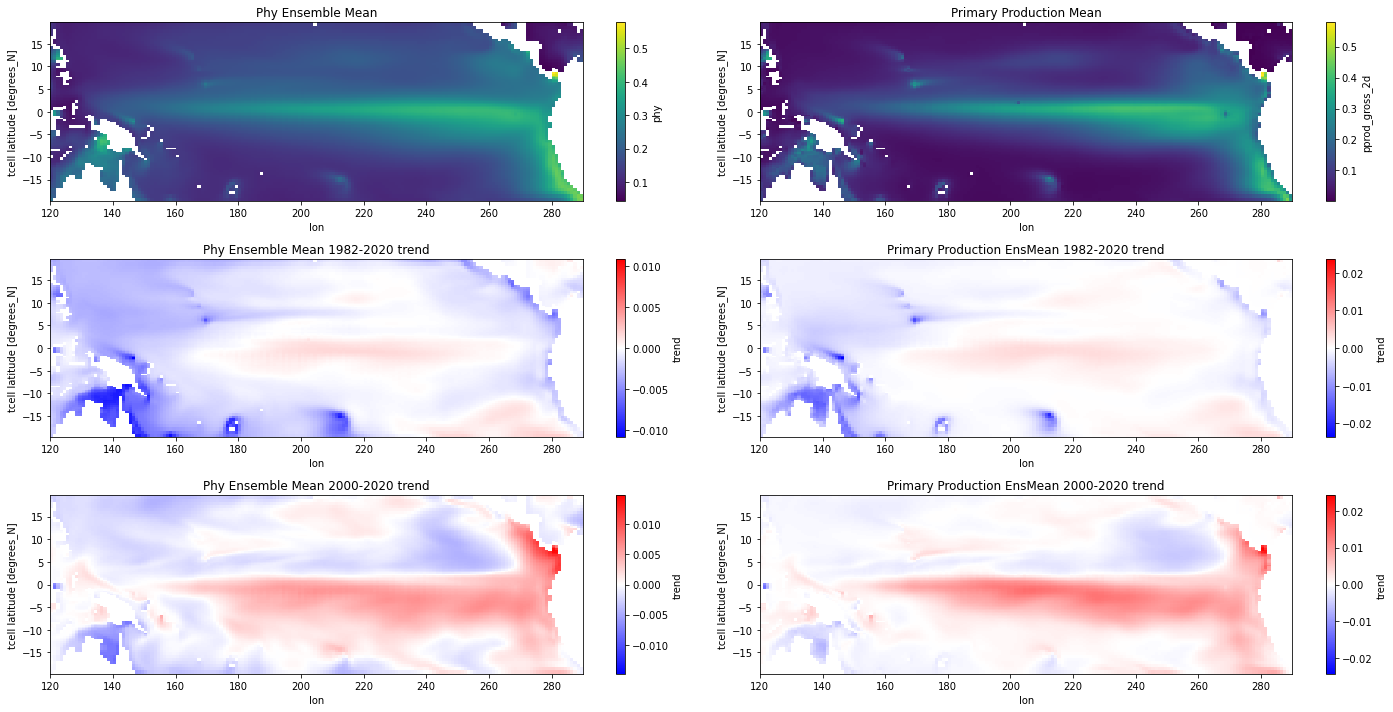

In [13]:
#Test the plotting function. Not super easy to use to be honest. 
titles=[
    'Phy Ensemble Mean',
    'Primary Production Mean',
    'Phy Ensemble Mean 1982-2020 trend',
    'Primary Production EnsMean 1982-2020 trend',
    'Phy Ensemble Mean 2000-2020 trend',
    'Primary Production EnsMean 2000-2020 trend']



mean_trends_82_20(lmean=phy_mean.phy,
                  ltrend82=phy_trend82.trend,
                  ltrend20=phy_trend20.trend,
                  rmean=pprod_mean.pprod_gross_2d,
                  rtrend82=pprod_trend82.trend,
                  rtrend20=pprod_trend20.trend,
                  titles=titles,
                  ltrendmm=None,
                  rtrendmm=None,
                  ltrendm=None,
                  rtrendm=None,
                  l_conversion=1,
                  r_conversion=6.625*12*86400/1000,
                  meancolormap='viridis',
                  figsize=(20,10))

## Lets look at and compare model CO2 flux to Landshutzer (spatial)

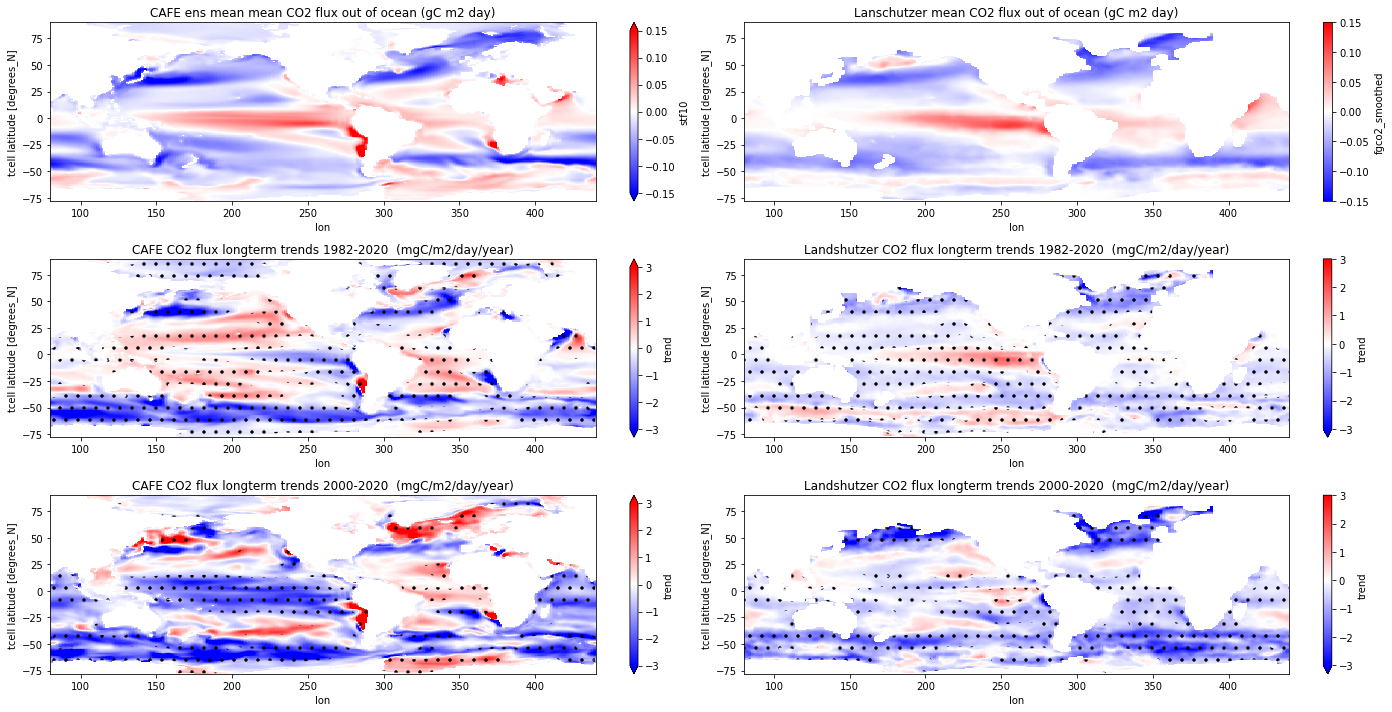

In [14]:
#CO2 FLUX mean and trends
plt.figure(figsize=(20,10))
plt.subplot(321)

(((cafe_co2_mean.stf10.mean(dim='time')/1000)*86400)*-12).plot(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('CAFE ens mean mean CO2 flux out of ocean (gC m2 day)')

plt.subplot(322)
(land_co2.fgco2_smoothed).mean(dim='time').plot(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('Lanschutzer mean CO2 flux out of ocean (gC m2 day)')

plt.subplot(323)
((((cafe_co2_82tr.trend/1000)*86400)*-12*1000)).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('CAFE CO2 flux longterm trends 1982-2020  (mgC/m2/day/year)')
plt.contourf(cafe_co2_82tr.pval.lon,cafe_co2_82tr.pval.lat,cafe_co2_82tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
plt.tight_layout()


plt.subplot(324)
((land_co2_82tr.trend)*1000).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('Landshutzer CO2 flux longterm trends 1982-2020  (mgC/m2/day/year)')
plt.contourf(land_co2_82tr.pval.lon,land_co2_82tr.pval.lat,land_co2_82tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
plt.tight_layout()


plt.subplot(325)
((((cafe_co2_20tr.trend/1000)*86400)*-12*1000)).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('CAFE CO2 flux longterm trends 2000-2020  (mgC/m2/day/year)')
plt.contourf(cafe_co2_20tr.pval.lon,cafe_co2_20tr.pval.lat,cafe_co2_20tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   
plt.tight_layout()


plt.subplot(326)
((land_co2_20tr.trend)*1000).plot(vmax=3,vmin=-3,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
plt.title('Landshutzer CO2 flux longterm trends 2000-2020  (mgC/m2/day/year)')
plt.contourf(land_co2_20tr.pval.lon,land_co2_20tr.pval.lat,land_co2_20tr.pval.values,colors='none',hatches=['.'],levels=[0,0.05])   


plt.tight_layout()



Text(0, 0.5, 'lat')

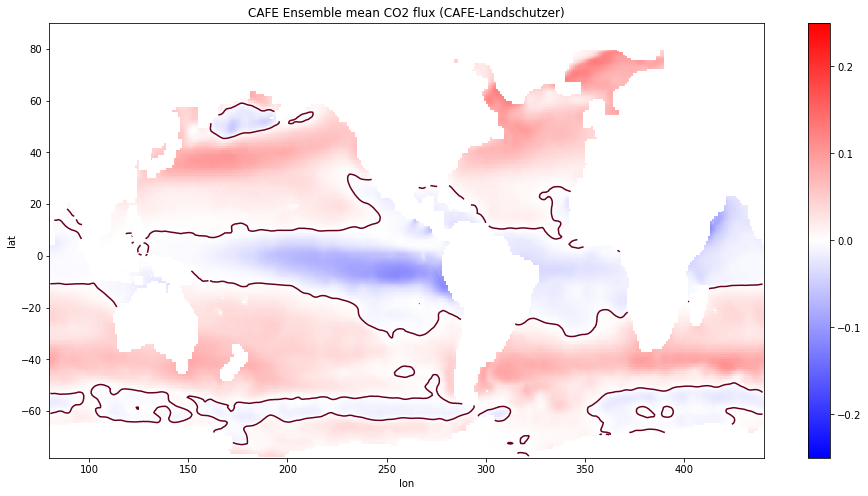

In [15]:
#Look at the difference between ensemble 1 and landschutzer
plt.figure(figsize=(16,8))
((cafe_co2_mean.stf10.mean(dim='time'))-land_co2.fgco2_smoothed.mean(dim='time')).plot(vmin=-0.25,vmax=0.25,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
((cafe_co2_mean.stf10.mean(dim='time'))-land_co2.fgco2_smoothed.mean(dim='time')).plot.contour(levels=[0])
                                                                                                 
plt.title('CAFE Ensemble mean CO2 flux (CAFE-Landschutzer)')
plt.ylabel('lat')

#plt.subplot(212)
#(sst_cafe.mean(dim=['time','ensemble'])-sst_obs.mean(dim='time')).plot(vmin=-1.5,vmax=1.5,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
#(sst_cafe.mean(dim=['time','ensemble'])-sst_obs.mean(dim='time')).plot.contour(levels=[0])
#plt.title('Mean CAFE SST anomoly (CAFE-Reynolds)')
#plt.ylabel('Lat')
#plt.tight_layout()

In [16]:
client

<Client: 'tcp://10.0.128.139:41049' processes=8 threads=8, memory=59.60 GiB>

What year has the Min or Max seasonality.

## Lets look at and compare model CO2 flux to Landshutzer (temporal)

cafe Co2 flux: 0.022411992866889417
land co2 flux: 0.028903054138014892
Whole EqPac : -17.8286516642985% err
cafe Co2 flux: 0.04776027503005722
land co2 flux: 0.06976458238986695
SouthEast EqPac : -21.37465213848831% err
cafe Co2 flux: 0.014236568198916121
land co2 flux: 0.016801987690276132
NorthEast EqPac : -19.734110382334382% err
cafe Co2 flux: 0.03099842161448667
land co2 flux: 0.043283285040071534
All East EqPac : -17.21155184208158% err
cafe Co2 flux: 0.027685718180518855
land co2 flux: 0.03421978466709998
Central EqPac : -9.861949124898475% err
cafe Co2 flux: 0.02013038788349655
land co2 flux: 0.017361798570402293
Dateline EqPac : -2.8297158845945165% err
cafe Co2 flux: 0.005361506035280113
land co2 flux: 0.0037532228433049663
FarWest EqPac : -377.2976980886997% err


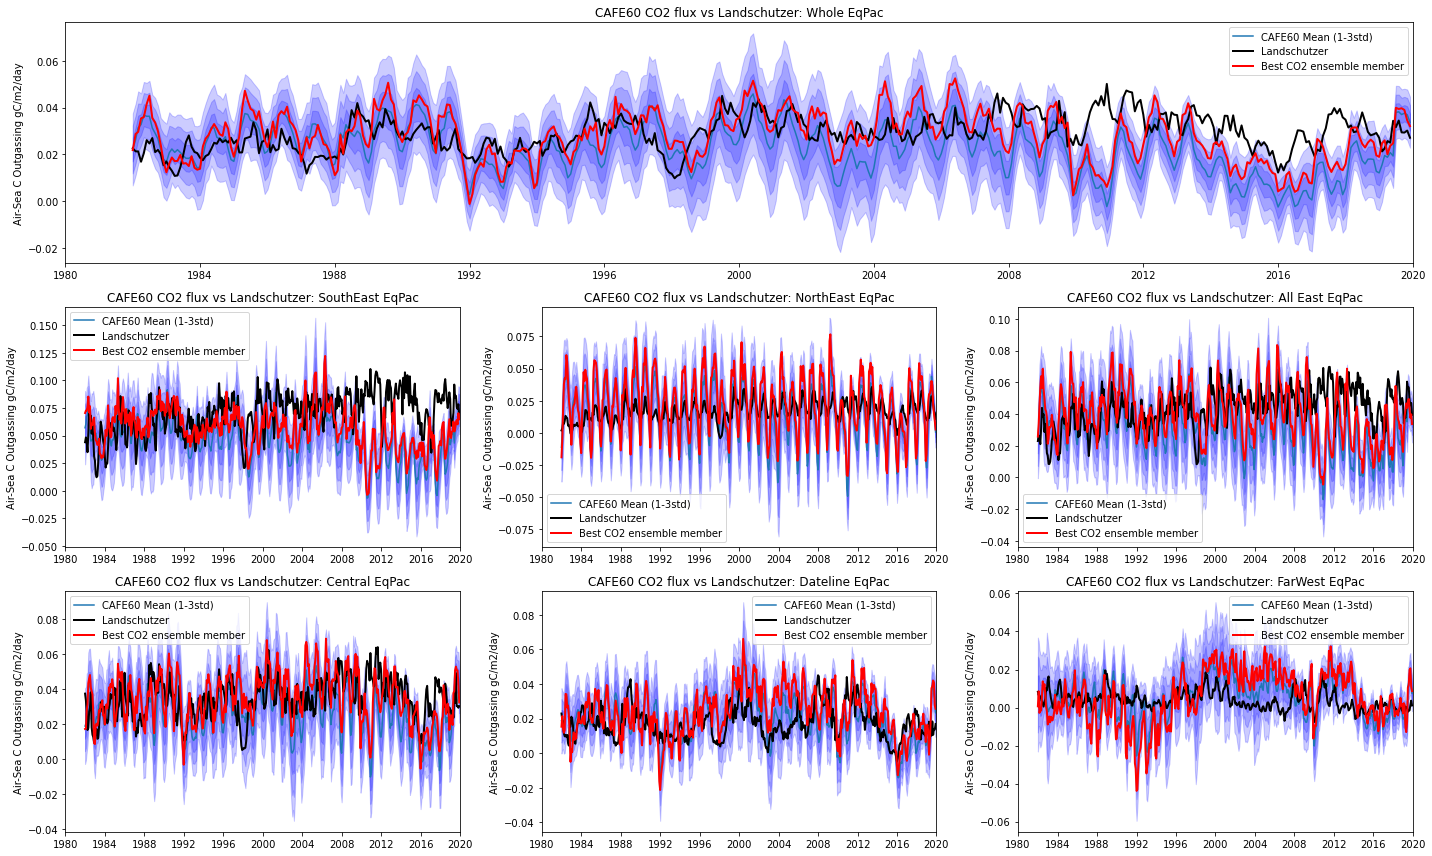

<xarray.Dataset>
Dimensions:      (ensemble: 96, region: 7)
Coordinates:
  * ensemble     (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96
  * region       (region) int64 0 1 2 3 4 5 6
Data variables:
    percenterr   (region, ensemble) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    bias         (region, ensemble) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    mae          (region, ensemble) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    region_name  (region) <U15 'Whole EqPac' ... 'FarWest EqPac'


PermissionError: [Errno 13] Permission denied: b'/g/data4/xv83/np1383/processed_data/err/regional_co2_err.nc'

In [21]:
#Ok how does this error look through time for different parts of the Pacific.
labels=['Whole EqPac',
       'SouthEast EqPac',
       'NorthEast EqPac',
        'All East EqPac',
        'Central EqPac',
        'Dateline EqPac',
        'FarWest EqPac']

locs=[[-15,15,150,275],
      [-15,0,225,250],
      [0,15,225,250],
      [-15,15,225,250],
      [-15,15,200,225],
      [-15,15,175,200],
      [-15,15,150,175]]
      
plt.figure(figsize=(20,12))

all_err=[]
for i,latlon in enumerate(locs):
    #print(i)
    #Conversion  #mmol/s to mol/s to mol/day to g/day and also invert for sea-air flux
    cafe_co2_std_reg=(cafe_co2_all_g).sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])
    cafe_co2_mean_reg=(cafe_co2_all_g).sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
    
    land_co2_std_reg=((land_co2.fgco2_smoothed)).sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])
    land_co2_mean_reg=((land_co2.fgco2_smoothed)).sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
    
    print('cafe Co2 flux: '+ str(cafe_co2_mean_reg.mean(dim=['time','ensemble']).stf10.values))
    print('land co2 flux: '+str(land_co2_mean_reg.mean(dim=['time']).values))
    
    #region_co2_path='../processed_data/co2_region_ens/co2_regional_ens_'+str(labels[i])+'.nc'
    #cafe_co2_mean_reg.to_netcdf(region_co2_path)
    
    err=cafe_co2_mean_reg.std(dim='ensemble').load()
    m=cafe_co2_mean_reg.mean(dim='ensemble').load()
    
   
    
    if i==0:
        ax=plt.subplot(3,1,1)
    else:
        ax=plt.subplot(3,3,3+i)
    ax.plot(m.time,m.stf10)
    ax.fill_between(err.time.values,m.stf10+(err*1).stf10,m.stf10-(err*1).stf10,alpha=0.2,color='blue')
    ax.fill_between(err.time.values,m.stf10+(err*2).stf10,m.stf10-(err*2).stf10,alpha=0.2,color='blue')
    ax.fill_between(err.time.values,m.stf10+(err*3).stf10,m.stf10-(err*3).stf10,alpha=0.2,color='blue')

    ax.plot(land_co2_mean_reg.time,land_co2_mean_reg,c='k',linewidth=2)
    
    # Plot the Seemingly most accurate CO2 flux ens member
    ax.plot(cafe_co2_mean_reg.time.values,cafe_co2_mean_reg.stf10.sel(ensemble=best_ensemble_member),c='r',linewidth=2)
    
    
    ax.legend(['CAFE60 Mean (1-3std)','Landschutzer','Best CO2 ensemble member'])
    ax.set_xlim([np.datetime64('1980-01-01'),np.datetime64('2020-01-01')])
    ax.set_ylabel('Air-Sea C Outgassing gC/m2/day')
    #ax.set_title('CO2 flux comparisons')
    ax.set_title('CAFE60 CO2 flux vs Landschutzer: '+labels[i])

    
    #Calculate biases
    
    #These biases might be backwards.
    perc_err=(((cafe_co2_mean_reg.stf10-land_co2_mean_reg)/land_co2_mean_reg)*100).mean(dim='time')
    bias=(cafe_co2_mean_reg.stf10-land_co2_mean_reg).mean(dim='time')
    mae=np.abs(cafe_co2_mean_reg.stf10-land_co2_mean_reg).mean(dim='time')
    print(labels[i]+' : '+str(perc_err.mean(dim='ensemble').values) + '% err')
    perc_err.name='percenterr'
    bias.name='bias'
    mae.name='mae'
    err_stats=xr.merge([perc_err,bias,mae],compat='override')
    err_stats['region']=i
    err_stats['region_name']=labels[i]
    all_err.append(err_stats)
    
regional_err=xr.concat(all_err,dim='region')

#Where do we want to save results??
#regional_err.to_netcdf('/scratch1/pit071/CO2_flux_error.nc')
plt.tight_layout()
plt.show()
print(regional_err)
regional_err.to_netcdf('../processed_data/err/regional_co2_err.nc')

## Lets look at and compare model CO2 flux to Landshutzer (seasonal)

starting [-15, 15, 150, 275]
starting [-15, 0, 225, 250]
starting [0, 15, 225, 250]
starting [-15, 15, 225, 250]
starting [-15, 15, 200, 225]
starting [-15, 15, 175, 200]
starting [-15, 15, 150, 175]


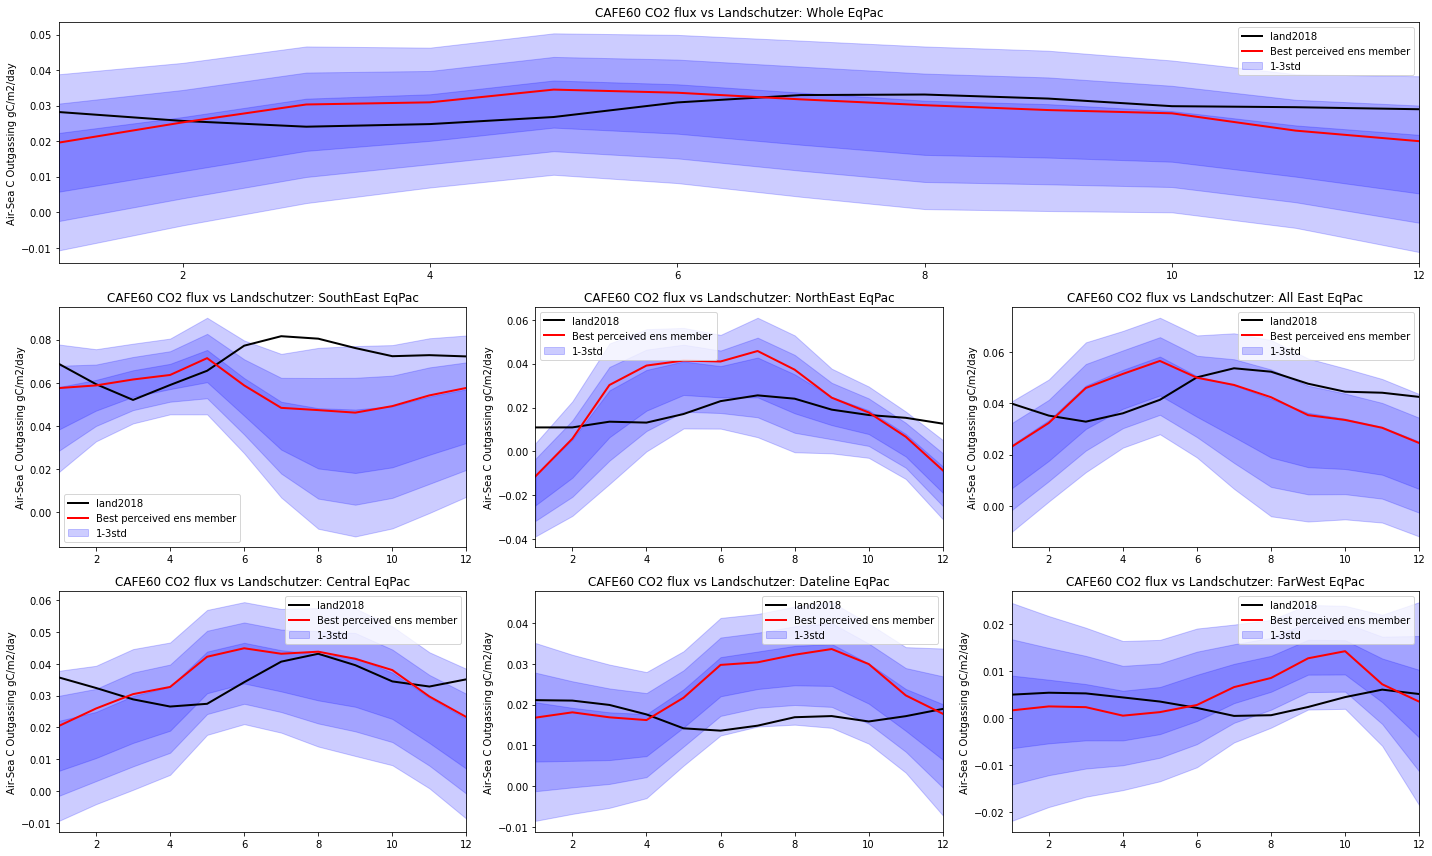

In [22]:
#They don't line up very well so lets check the seasonality
#clim=xr.open_dataset('/scratch1/pit071/CAFE60/processed/obs/landshutzermatear_clim_eqpac_regrid.nc').fgco2_clim/365
labels=['Whole EqPac',
       'SouthEast EqPac',
       'NorthEast EqPac',
        'All East EqPac',
        'Central EqPac',
        'Dateline EqPac',
        'FarWest EqPac']

locs=[[-15,15,150,275],
      [-15,0,225,250],
      [0,15,225,250],
      [-15,15,225,250],
      [-15,15,200,225],
      [-15,15,175,200],
      [-15,15,150,175]]
      
plt.figure(figsize=(20,12))

for i,latlon in enumerate(locs):
    print('starting '+str(latlon))
    cafe_seasonality=cafe_co2_all_g.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).stf10.groupby('time.month').mean()
 
    land_seasonality=land_co2.fgco2_smoothed.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).groupby('time.month').mean().mean(dim=['lat','lon'])

    if i==0:
        ax=plt.subplot(3,1,1)
    else:
        ax=plt.subplot(3,3,3+i)
        
    err=cafe_seasonality.std(dim='ensemble').mean(dim=['lat','lon']).load()
    m=cafe_seasonality.mean(['lat','lon','ensemble']).load()
    
    ax.fill_between(err.month,m+(err*1),m-(err*1),alpha=0.2,color='blue')
    ax.fill_between(err.month,m+(err*2),m-(err*2),alpha=0.2,color='blue')
    ax.fill_between(err.month,m+(err*3),m-(err*3),alpha=0.2,color='blue')

    ax.plot(land_seasonality.month,land_seasonality,c='k',linewidth=2)
    
    # Plot the Seemingly most accurate CO2 flux ens member
    ax.plot(cafe_seasonality.month,cafe_seasonality.mean(['lat','lon']).sel(ensemble=best_ensemble_member),c='r',linewidth=2)
    
    #olc=clim.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
    #olc['monthclim']=olc['monthclim']+1
    #ax.plot(olc.monthclim,olc,c='k',linewidth=2,linestyle='--')
    
    
    #Ok we could plot the individual lines using seaborn. 
    
    #land_seasonality=land_seasonality.to_dataframe().reset_index()
    #seasonal=cafe_seasonality.stf10.mean(dim=['lat','lon']).to_dataframe().reset_index()
    #sns.lineplot(data=seasonal,x='month',y='stf10',hue='ensemble',ax=ax)#,hue='ensemble')
    #sns.lineplot(data=land_seasonality,x='month',y='fgco2_smoothed',color='k',linewidth=3,ax=ax)#,hue='ensemble')
        
    ax.set_xlim([1,12])
    ax.set_ylabel('Air-Sea C Outgassing gC/m2/day')
    ax.set_title('CAFE60 CO2 flux vs Landschutzer: '+labels[i])
    ax.legend(['land2018','Best Ensemble','1-3std']) #,
plt.tight_layout()

In [ ]:
#olc=clim.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
#olc['monthclim']=olc['monthclim']+1
#ax.plot(olc.monthclim,olc,c='k',linewidth=2,linestyle='--')


#Ok we could plot the individual lines using seaborn. 

#land_seasonality=land_seasonality.to_dataframe().reset_index()
#seasonal=cafe_seasonality.stf10.mean(dim=['lat','lon']).to_dataframe().reset_index()
#sns.lineplot(data=seasonal,x='month',y='stf10',hue='ensemble',ax=ax)#,hue='ensemble')
#sns.lineplot(data=land_seasonality,x='month',y='fgco2_smoothed',color='k',linewidth=3,ax=ax)#,hue='ensemble')

#ax.set_xlim([1,12])
#ax.set_ylabel('Air-Sea C Outgassing gC/m2/day')
#ax.set_title('CAFE60 CO2 flux vs Landschutzer: '+labels[i])
#ax.legend(['land2018','1-3std']) #,

## Lets use those biases that we created before

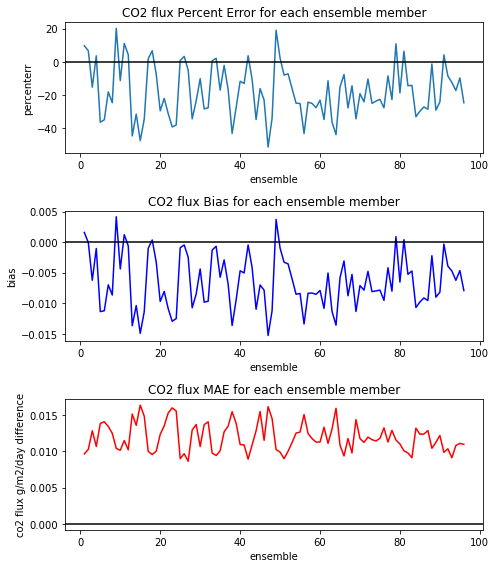

In [23]:
#Lets check the errors. 
plt.figure(figsize=(7,8))
plt.subplot(311)
regional_err.sel(region=0).percenterr.plot()
plt.title('CO2 flux Percent Error for each ensemble member')
plt.axhline(0,c='k')
plt.subplot(312)
regional_err.sel(region=0).bias.plot(c='b')
plt.axhline(0,c='k')
plt.title('CO2 flux Bias for each ensemble member')
plt.subplot(313)
regional_err.sel(region=0).mae.plot(c='r')
plt.axhline(0,c='k')
plt.title('CO2 flux MAE for each ensemble member')
plt.ylabel('co2 flux g/m2/day difference')

plt.tight_layout()

## Error

In [24]:
#Lets expand a bit further with calculating bias per pixel
#Calculate RMS and bias real quick... I say that but this might take a little while to process....  ()
#Might crash
# ------------------------------------------------
#Using the global / public vars here aha not good oh well.
def calculate_co2_err():
    model=cafe_co2_all_g.stf10#.mean(dim=['time','ensemble'])
    obs=land_co2.fgco2_smoothed#.mean(dim='time')

    diff=model-obs
    diff_log=np.log10(model)-np.log10(obs)
    bias=10**(diff_log)
    perc_err=((model-obs)/obs)*100
    rms=np.sqrt(diff**2)
    mae=np.abs(diff)

    perc_err.name='perc_err'
    rms.name='rms'
    bias.name='bias'
    diff.name='difference'
    mae.name='mae'

    all_error=xr.merge([perc_err,rms,bias,diff,mae])
    print(all_error.nbytes/1e9)
    all_error.to_netcdf('../processed_data/err/CO2_flux_allerror.nc')
    return True
#Combine these into a dataset and save? WHere are we saving the results?! Lets make some folders.
def mean_co2_err():
    err=xr.open_dataset('../processed_data/err/CO2_flux_allerror.nc',chunks='auto')
    err_tmean=err.mean(dim='time')
    err_tmean.to_netcdf('../processed_data/err/CO2_flux_meanerror.nc')

In [ ]:
# calculate_co2_err() #Takes a long time lots of Ram? But works! Mean over time doesnt though hmm.
# mean_co2_err() #Hasnt been working. Perhaps due to chunking issues? # Seems to work now maybe need low load on the super computer.

In [ ]:
#err=xr.open_dataset('../processed_data/err/CO2_flux_allerror.nc',chunks={'time':1})
#for i in err.ensemble:
#    #print(i.values)
#    model=err.sel(ensemble=i)
#    model.perc_err.mean(dim=['lat','lon']).plot(alpha=0.5)
#    plt.ylim([-1000,1000])

## Same again but for SST 

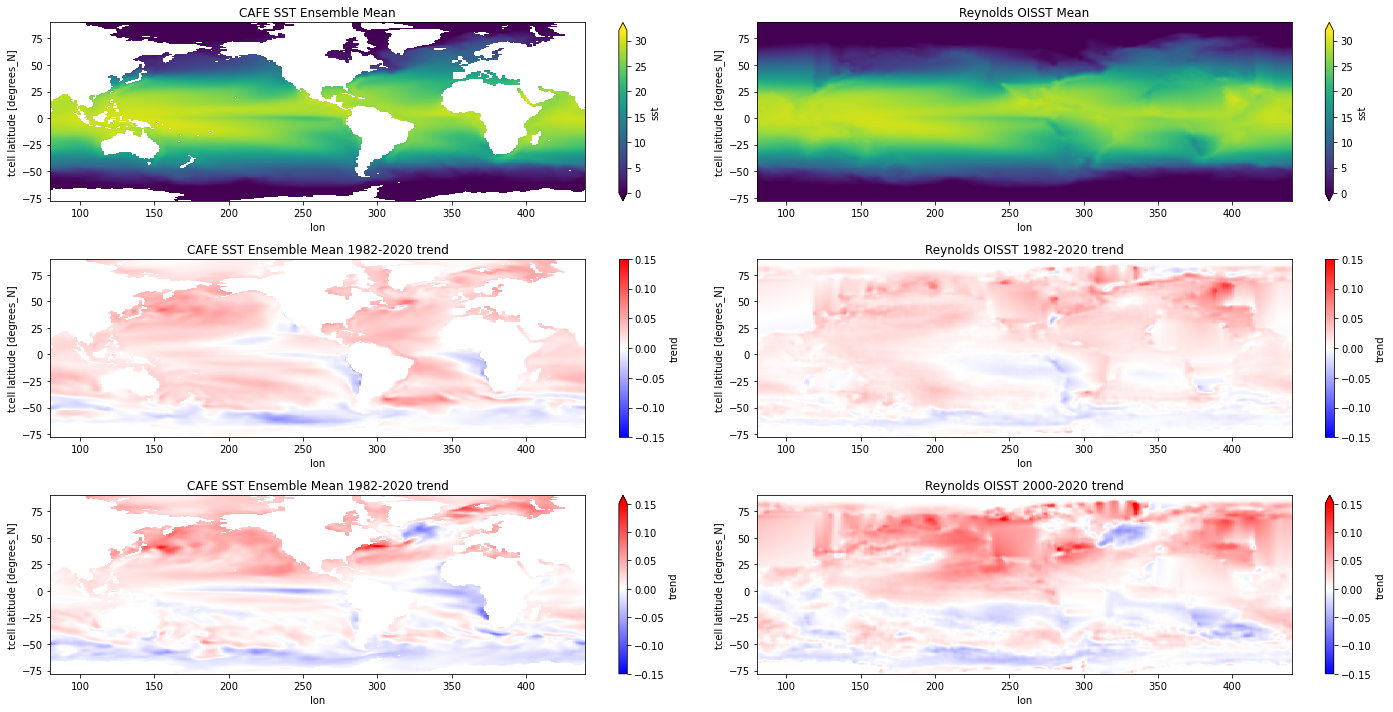

In [25]:
titles=[
    'CAFE SST Ensemble Mean',
    'Reynolds OISST Mean',
    'CAFE SST Ensemble Mean 1982-2020 trend',
    'Reynolds OISST 1982-2020 trend',
    'CAFE SST Ensemble Mean 1982-2020 trend',
    'Reynolds OISST 2000-2020 trend']

mean_trends_82_20(cafe_sst_mean.sst,cafe_sst_82tr.trend,cafe_sst_20tr.trend,rey_sst.sst,rey_sst_82tr.trend,rey_sst_20tr.trend,titles,[-0.15,0.15],[-0.15,0.15],[0,32],[0,32],1,1,'viridis')

Text(0, 0.5, 'lat')

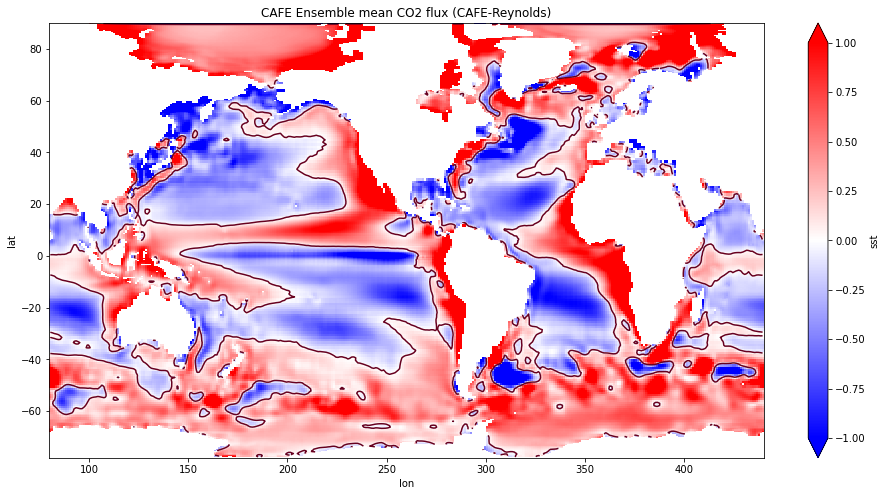

In [26]:
#Look at the difference between ensemble 1 and landschutzer
plt.figure(figsize=(16,8))
((cafe_sst_mean.sst.mean(dim='time'))-rey_sst.sst.mean(dim='time')).plot(vmin=-1,vmax=1,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
((cafe_sst_mean.sst.mean(dim='time'))-rey_sst.sst.mean(dim='time')).plot.contour(levels=[0])
                                                                                                 
plt.title('CAFE Ensemble mean CO2 flux (CAFE-Reynolds)')
plt.ylabel('lat')

#plt.subplot(212)
#(sst_cafe.mean(dim=['time','ensemble'])-sst_obs.mean(dim='time')).plot(vmin=-1.5,vmax=1.5,cmap='bwr')#(vmin=-0.15,vmax=0.15,cmap='bwr')
#(sst_cafe.mean(dim=['time','ensemble'])-sst_obs.mean(dim='time')).plot.contour(levels=[0])
#plt.title('Mean CAFE SST anomoly (CAFE-Reynolds)')
#plt.ylabel('Lat')
#plt.tight_layout()

In [27]:
cafe_sst_all

,Array,Chunk
Bytes,2.72 GiB,6.10 MiB
Shape,"(456, 96, 98, 170)","(1, 96, 98, 170)"
Count,457 Tasks,456 Chunks
Type,float32,numpy.ndarray


cafe SST: 27.503218
reynolds SST: 27.54546424878191
Whole EqPac : -0.15381511558948371% err
cafe SST: 25.667755
reynolds SST: 26.1668708216181
SouthEast EqPac : -1.9471139165195854% err
cafe SST: 27.234594
reynolds SST: 27.043836364801408
NorthEast EqPac : 0.727395481621342% err
cafe SST: 26.451178
reynolds SST: 26.605353593209752
All East EqPac : -0.5752185057484752% err
cafe SST: 27.596354
reynolds SST: 27.593424001001136
Central EqPac : 0.018956154794634215% err
cafe SST: 28.532915
reynolds SST: 28.570434690914357
Dateline EqPac : -0.12283531741314017% err
cafe SST: 29.205547
reynolds SST: 29.09406110548385
FarWest EqPac : 0.38916001506675646% err


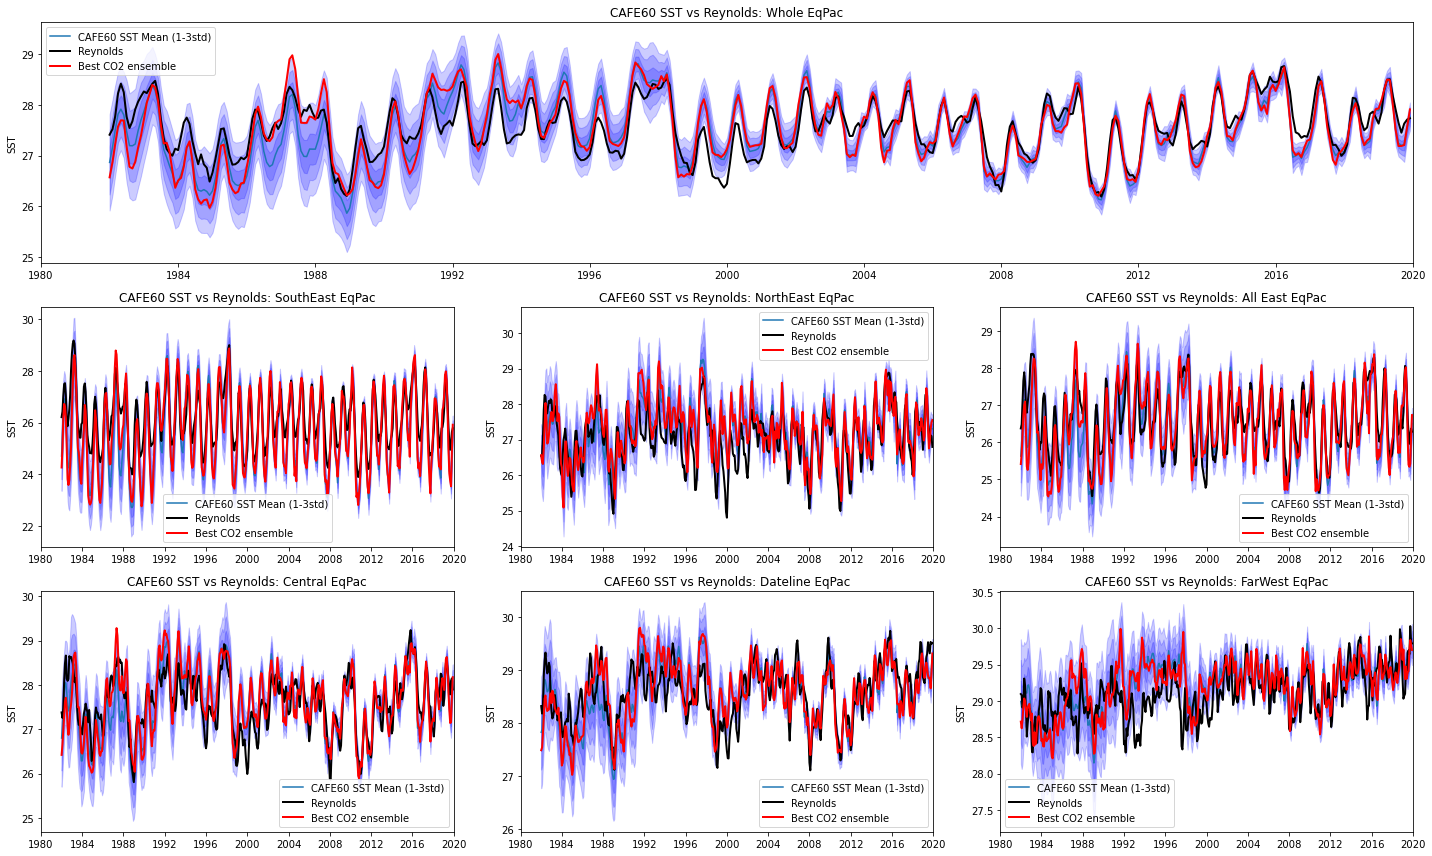

<xarray.Dataset>
Dimensions:      (ensemble: 96, region: 7)
Coordinates:
  * ensemble     (ensemble) int32 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96
  * region       (region) int64 0 1 2 3 4 5 6
Data variables:
    percenterr   (region, ensemble) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    bias         (region, ensemble) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    mae          (region, ensemble) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    region_name  (region) <U15 'Whole EqPac' ... 'FarWest EqPac'


PermissionError: [Errno 13] Permission denied: b'/g/data4/xv83/np1383/processed_data/err/regional_sst_err.nc'

In [32]:
#Ok how does this error look through time for different parts of the Pacific.
labels=['Whole EqPac',
       'SouthEast EqPac',
       'NorthEast EqPac',
        'All East EqPac',
        'Central EqPac',
        'Dateline EqPac',
        'FarWest EqPac']

locs=[[-15,15,150,275],
      [-15,0,225,250],
      [0,15,225,250],
      [-15,15,225,250],
      [-15,15,200,225],
      [-15,15,175,200],
      [-15,15,150,175]]
      
plt.figure(figsize=(20,12))

all_err=[]
for i,latlon in enumerate(locs):
    #Conversion  #mmol/s to mol/s to mol/day to g/day and also invert for sea-air flux. Reg short for region.
    cafe_sst_std_reg=(cafe_sst_all).sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])
    cafe_sst_mean_reg=(cafe_sst_all).sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
    
    rey_sst_std_reg=((rey_sst.sst)).sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).std(dim=['lat','lon'])
    rey_sst_mean_reg=((rey_sst.sst)).sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).mean(dim=['lat','lon'])
    
    print('cafe SST: '+ str(cafe_sst_mean_reg.mean(dim=['time','ensemble']).sst.values))
    print('reynolds SST: '+str(rey_sst_mean_reg.mean(dim=['time']).values))
    
    err=cafe_sst_mean_reg.std(dim='ensemble').load()
    m=cafe_sst_mean_reg.mean(dim='ensemble').load()
    
    if i==0:
        ax=plt.subplot(3,1,1)
    else:
        ax=plt.subplot(3,3,3+i)
    ax.plot(m.time,m.sst)
    ax.fill_between(err.time.values,m.sst+(err*1).sst,m.sst-(err*1).sst,alpha=0.2,color='blue')
    ax.fill_between(err.time.values,m.sst+(err*2).sst,m.sst-(err*2).sst,alpha=0.2,color='blue')
    ax.fill_between(err.time.values,m.sst+(err*3).sst,m.sst-(err*3).sst,alpha=0.2,color='blue')

    ax.plot(rey_sst_mean_reg.time,rey_sst_mean_reg,c='k',linewidth=2)
    
        # Plot the Seemingly most accurate CO2 flux ens member
    ax.plot(cafe_sst_mean_reg.time,cafe_sst_mean_reg.sst.sel(ensemble=best_ensemble_member),c='r',linewidth=2)

    
    ax.legend(['CAFE60 SST Mean (1-3std)','Reynolds','Best CO2 ensemble'])
    ax.set_xlim([np.datetime64('1980-01-01'),np.datetime64('2020-01-01')])
    ax.set_ylabel('SST')
    #ax.set_title('CO2 flux comparisons')
    ax.set_title('CAFE60 SST vs Reynolds: '+labels[i])


    
    #Calculate biases
    
    #These biases might be backwards.
    perc_err=(((cafe_sst_mean_reg.sst-rey_sst_mean_reg)/rey_sst_mean_reg)*100).mean(dim='time')
    bias=(cafe_sst_mean_reg.sst-rey_sst_mean_reg).mean(dim='time')
    mae=np.abs(cafe_sst_mean_reg.sst-rey_sst_mean_reg).mean(dim='time')
    
    print(labels[i]+' : '+str(perc_err.mean(dim='ensemble').values) + '% err')
    perc_err.name='percenterr'
    bias.name='bias'
    mae.name='mae'
    err_stats=xr.merge([perc_err,bias,mae],compat='override')
    err_stats['region']=i
    err_stats['region_name']=labels[i]
    all_err.append(err_stats)
    
regional_sst_err=xr.concat(all_err,dim='region')

#Where do we want to save results??
#regional_err.to_netcdf('/scratch1/pit071/CO2_flux_error.nc')
plt.tight_layout()
plt.show()
print(regional_sst_err)
regional_sst_err.to_netcdf('../processed_data/err/regional_sst_err.nc')

0
1
2
3
4
5
6


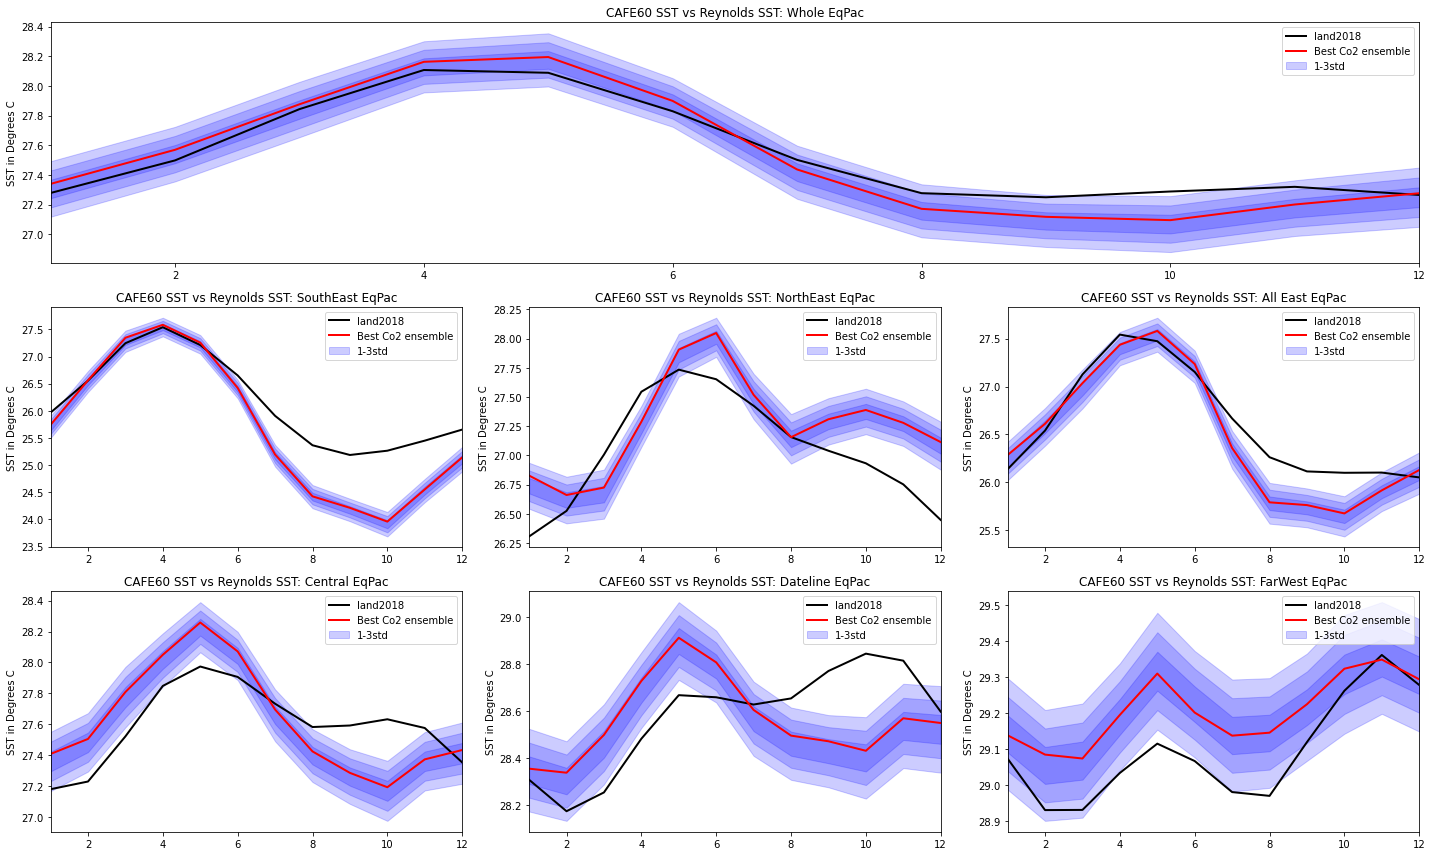

In [14]:
#They don't line up very well so lets check the seasonality for SST

labels=['Whole EqPac',
       'SouthEast EqPac',
       'NorthEast EqPac',
        'All East EqPac',
        'Central EqPac',
        'Dateline EqPac',
        'FarWest EqPac']

locs=[[-15,15,150,275],
      [-15,0,225,250],
      [0,15,225,250],
      [-15,15,225,250],
      [-15,15,200,225],
      [-15,15,175,200],
      [-15,15,150,175]]
      
plt.figure(figsize=(20,12))

for i,latlon in enumerate(locs):
    #print(i)
    cafe_seasonality=cafe_sst_all.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).sst.groupby('time.month').mean()
 
    rey_seasonality=rey_sst.sst.sel(lat=slice(latlon[0],latlon[1]),lon=slice(latlon[2],latlon[3])).groupby('time.month').mean().mean(dim=['lat','lon'])

    if i==0:
        ax=plt.subplot(3,1,1)
    else:
        ax=plt.subplot(3,3,3+i)
        
    err=cafe_seasonality.std(dim='ensemble').mean(dim=['lat','lon']).load()
    m=cafe_seasonality.mean(['lat','lon','ensemble']).load()
    
    ax.fill_between(err.month,m+(err*1),m-(err*1),alpha=0.2,color='blue')
    ax.fill_between(err.month,m+(err*2),m-(err*2),alpha=0.2,color='blue')
    ax.fill_between(err.month,m+(err*3),m-(err*3),alpha=0.2,color='blue')

    ax.plot(rey_seasonality.month,rey_seasonality,c='k',linewidth=2)
    
    # Plot the Seemingly most accurate CO2 flux ens member
    ax.plot(cafe_seasonality.month,cafe_seasonality.mean(['lat','lon']).sel(ensemble=best_ensemble_member),c='r',linewidth=2)
    
    #Ok we could plot the individual lines using seaborn. 
    
    #land_seasonality=land_seasonality.to_dataframe().reset_index()
    #seasonal=cafe_seasonality.stf10.mean(dim=['lat','lon']).to_dataframe().reset_index()
    #sns.lineplot(data=seasonal,x='month',y='stf10',hue='ensemble',ax=ax)#,hue='ensemble')
    #sns.lineplot(data=land_seasonality,x='month',y='fgco2_smoothed',color='k',linewidth=3,ax=ax)#,hue='ensemble')
        
    ax.set_xlim([1,12])
    ax.set_ylabel('SST in Degrees C')
    ax.set_title('CAFE60 SST vs Reynolds SST: '+labels[i])
    ax.legend(['land2018','Best Co2 ensemble','1-3std']) #,
plt.tight_layout()

In [13]:
#Lets expand a bit further with calculating bias per pixel
#Calculate RMS and bias real quick... I say that but this might take a little while to process....  ()
#Might crash
# ------------------------------------------------
#Using the global / public vars here aha not good oh well.
def calculate_sst_err():
    model=cafe_sst_all.sst#.mean(dim=['time','ensemble'])
    obs=rey_sst.sst#.mean(dim='time')

    diff=model-obs
    diff_log=np.log10(model)-np.log10(obs)
    bias=10**(diff_log)
    perc_err=((model-obs)/obs)*100
    rms=np.sqrt(diff**2)
    mae=np.abs(diff)

    perc_err.name='perc_err'
    rms.name='rms'
    bias.name='bias'
    diff.name='difference'
    mae.name='mae'

    all_error=xr.merge([perc_err,rms,bias,diff,mae])
    print(all_error.nbytes/1e9)
    all_error.to_netcdf('../processed_data/err/sst_allerror.nc')
    return True
#Combine these into a dataset and save? WHere are we saving the results?! Lets make some folders.
def mean_sst_err():
    err=xr.open_dataset('../processed_data/err/sst_allerror.nc',chunks='auto')
    err_tmean=err.mean(dim='time')
    err_tmean.to_netcdf('../processed_data/err/sst_meanerror.nc')

In [ ]:
#calculate_sst_err()
mean_sst_err()